**Exploratory Data Analysis**

Read in the Dataset and look at the basic shape.

In [3]:
%matplotlib inline
import warnings 
warnings.simplefilter(action='ignore')
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('MoralMachine.csv', index_col=None, low_memory=False, header = 0)
df.head()[0:10]

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6968366610050750.00,13,0,0,0,0,Female,Gender,...,Desktop,0.00,0.00,RUS,32.00,bachelor,male,35000,0.50,0.61
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6968366610050750.00,8,0,1,0,0,Fat,Fitness,...,Desktop,0.00,0.00,RUS,32.00,bachelor,male,35000,0.50,0.61
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6968366610050750.00,2,0,0,0,2,Young,Age,...,Desktop,0.00,1.00,RUS,32.00,bachelor,male,35000,0.50,0.61
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6968366610050750.00,1,0,1,0,2,Pets,Species,...,Desktop,0.00,1.00,RUS,32.00,bachelor,male,35000,0.50,0.61
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6968366610050750.00,5,0,1,0,0,Fit,Fitness,...,Desktop,0.00,1.00,RUS,32.00,bachelor,male,35000,0.50,0.61


In [5]:
df.shape

(11286141, 27)

**Size of Dataset**

Without removing anything: 11,286,141 (27 columns) 

After removing other sexes: 9,924,739

After removing default income: 8,162,082

After removing ages that are out of bounds: 6,668,693

After removing users who had answered over 28 times: 6,654,387

After removing the random entries: 5,947,161

In [6]:
df.columns

Index(['ResponseID', 'ExtendedSessionID', 'UserID', 'ScenarioOrder',
       'Intervention', 'PedPed', 'Barrier', 'CrossingSignal', 'AttributeLevel',
       'ScenarioTypeStrict', 'ScenarioType', 'DefaultChoice',
       'NonDefaultChoice', 'DefaultChoiceIsOmission', 'NumberOfCharacters',
       'DiffNumberOFCharacters', 'Saved', 'Template', 'DescriptionShown',
       'LeftHand', 'UserCountry3', 'Review_age', 'Review_education',
       'Review_gender', 'Review_income', 'Review_political',
       'Review_religious'],
      dtype='object')

**Null Values**

Quite a lot of null values for age - when looking through some values these tend to match when the other columns are given default although not always. But in 95% of the cases the values after such as income level and education aren't answered properly so rows when age isn't answered re removed

In [7]:
df.isnull().sum()

ResponseID                       0
ExtendedSessionID                0
UserID                           0
ScenarioOrder                    0
Intervention                     0
PedPed                           0
Barrier                          0
CrossingSignal                   0
AttributeLevel                   0
ScenarioTypeStrict               0
ScenarioType                     0
DefaultChoice              1201814
NonDefaultChoice           1201814
DefaultChoiceIsOmission    1201814
NumberOfCharacters               0
DiffNumberOFCharacters           0
Saved                            0
Template                       398
DescriptionShown               398
LeftHand                       398
UserCountry3                 41641
Review_age                 1360030
Review_education                 0
Review_gender                   90
Review_income                    0
Review_political                 0
Review_religious                 0
dtype: int64

In [8]:
#Lets take a look at the data types
df.dtypes

ResponseID                  object
ExtendedSessionID           object
UserID                     float64
ScenarioOrder                int64
Intervention                 int64
PedPed                       int64
Barrier                      int64
CrossingSignal               int64
AttributeLevel              object
ScenarioTypeStrict          object
ScenarioType                object
DefaultChoice               object
NonDefaultChoice            object
DefaultChoiceIsOmission    float64
NumberOfCharacters           int64
DiffNumberOFCharacters       int64
Saved                        int64
Template                    object
DescriptionShown           float64
LeftHand                   float64
UserCountry3                object
Review_age                 float64
Review_education            object
Review_gender               object
Review_income               object
Review_political           float64
Review_religious           float64
dtype: object

**Value Counts**

The following step is to observe the number of responses that each user makes. A user should be faced with 13 scenarios with each scenario having two response entries, so if a user completes the 'experiment', there should be 26 responses for that user. There are some with slightly fewer responses, but those that are clearly outliers with either too few or too many response should be removed

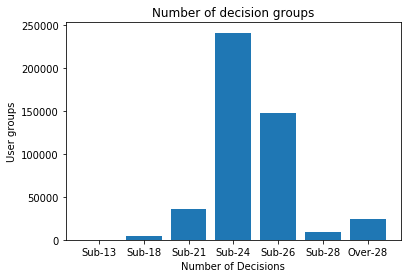

In [9]:
#Grouping the value counts of Users into different bins to see what the average tended to be
value_counts = df['UserID'].value_counts()

smaller_13 = value_counts[value_counts < 13].index  
smaller_18 = value_counts[value_counts >= 13].index & value_counts[value_counts < 18].index  
smaller_21 = value_counts[value_counts >= 18].index & value_counts[value_counts < 21].index  
smaller_24 = value_counts[value_counts >= 21].index & value_counts[value_counts < 24].index  
smaller_26 = value_counts[value_counts >= 24].index & value_counts[value_counts < 26].index  
smaller_28 = value_counts[value_counts >= 26].index & value_counts[value_counts < 28].index  
larger_28 = value_counts[value_counts >= 28].index

smaller_13_length = len(smaller_13)
smaller_18_length = len(smaller_18)
smaller_21_length = len(smaller_21)
smaller_24_length = len(smaller_24)
smaller_26_length = len(smaller_26)
smaller_28_length = len(smaller_28)
larger_28_length = len(larger_28)

all_lengths = [smaller_13_length, smaller_18_length, smaller_21_length, smaller_24_length, smaller_26_length, smaller_28_length, larger_28_length]
categories = ["Sub-13", "Sub-18", "Sub-21", "Sub-24", "Sub-26", "Sub-28", "Over-28"]
x_pos = [i for i, _ in enumerate(categories)]

plt.bar(x_pos, all_lengths, color='green')
plt.bar(categories, all_lengths)

plt.xlabel("Number of Decisions")
plt.ylabel("User groups")
plt.title("Number of decision groups")

plt.xticks(x_pos, categories)

plt.show()

In [10]:
#Removing Users with less than 22 responses and more than 28 responses

to_remove = value_counts[value_counts >= 28].index
to_remove_1 = value_counts[value_counts < 22].index
df = df[~df.ExtendedSessionID.isin(to_remove)]
df = df[~df.ExtendedSessionID.isin(to_remove_1)]

**Scenario Counts**

There are 7 different scenarios including 'Random' which will be removed as it is not of interest for this study. Social Status clearly has a lot less entries (about 1/3 of the other scenarios) than the other scenarios.

In [11]:
#Looking at Scenario Type Strict
df['ScenarioTypeStrict'].value_counts()

Utilitarian      1977056
Species          1919396
Gender           1917456
Age              1917290
Fitness          1916408
Random            957497
Social Status     681038
Name: ScenarioTypeStrict, dtype: int64

**Exploring the User Demographics**

**Country Distribution**

A quick look at the country distribution shows the large number of US users and the other top 9 countries.

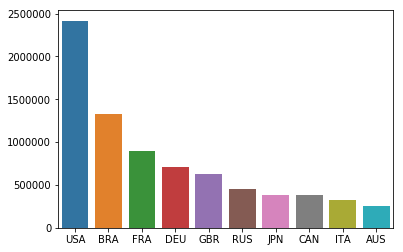

In [12]:
country_count = df['UserCountry3'].value_counts()[0:10]
sns.barplot(country_count.index, country_count.values)

**Education Distribution**

bachelor      2143555
graduate      1900875
high          1778943
underHigh     1597312
college       1455204
vocational     368176
Name: Review_education, dtype: int64


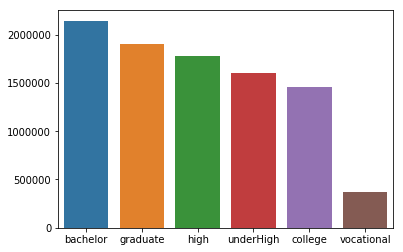

In [13]:
#Convert to numerical
df = df[df.Review_education != 'default']
df = df[df.Review_education != 'others']
education = df['Review_education'].value_counts()
print(education)
sns.barplot(education.index, education.values)

**Gender Distribution**

Removing those that are "default", "others" or "apache helicopter" as they form a large minority.

male      6526098
female    2451185
Name: Review_gender, dtype: int64


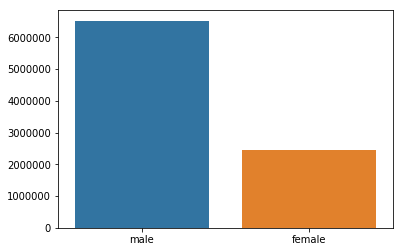

In [14]:
df = df[df.Review_gender != 'default']
df = df[df.Review_gender != 'others']
df = df[df.Review_gender != 'apache helicopter']
gender = df['Review_gender'].value_counts()
print(gender)
sns.barplot(gender.index, gender.values)

**Income Levels**

Can see the high number of users with very low incomes, as they're such a young age, with high education levels and with the nature of the study, we could make the assumption that there are a high proportion of students.

0.00         2841329
5000.00       749666
50000.00      720985
35000.00      695694
15000.00      625754
100000.00     625710
25000.00      585418
10000.00      551587
80000.00      316048
Name: Review_income, dtype: int64


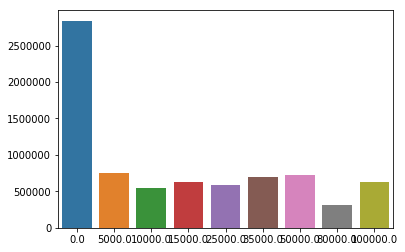

In [15]:
df = df[df.Review_income != 'default']
df['Review_income'] = df['Review_income'].map({'under5000': 0, '10000': 10000, 'above100000': 100000, 
                                               '5000': 5000, '50000': 50000, '35000': 35000, '15000': 15000,
                                              '25000': 25000, '10000': 10000, '80000': 80000})
income = df['Review_income'].value_counts()
sns.barplot(income.index, income.values)
print(income)

**Age Distribution**

There are some ridiculous values within the age category, therefore all values below 16 or above 74 are removed. Can see a high proportion of youngsters from the graph below.

In [16]:
df = df[df['Review_age'] < 75] 
df = df[df['Review_age'] > 16]
age = df['Review_age'].value_counts()

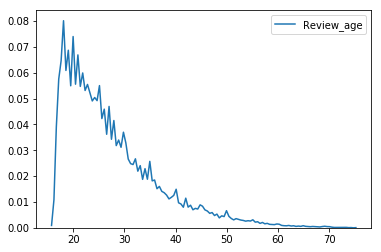

In [17]:
sns.kdeplot(df['Review_age'])

Graph below to showcase the distribution across education and separated by gender.

In [19]:
df.groupby(['Review_education'])['Review_gender'].value_counts().plot(kind='Bar')

ValueError: Bar is not a valid plot kind

**Religion Distribution**

Indicator between 0 and 1 as to how strong they feel religiously.

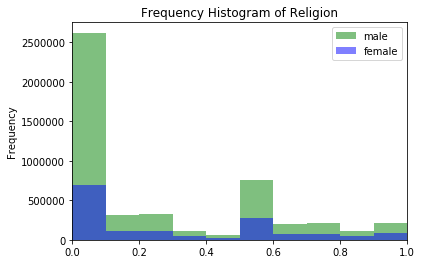

In [20]:
religion_male = df.loc[df.Review_gender=='male', 'Review_religious']
religion_female = df.loc[df.Review_gender=='female', 'Review_religious']

kwargs = dict(alpha=0.5, bins=10)
plt.hist(religion_male, **kwargs, color='g', label='male')
plt.hist(religion_female, **kwargs, color='b', label='female')
plt.gca().set(title='Frequency Histogram of Religion', ylabel='Frequency')
plt.xlim(0,1)
plt.legend();

**Political Distribution**

Indicator between 0 and 1 as to how strong they feel politically.

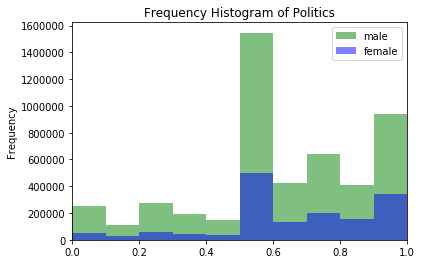

In [21]:
#Review Political situation
political_male = df.loc[df.Review_gender=='male', 'Review_political']
political_female = df.loc[df.Review_gender=='female', 'Review_political']

kwargs = dict(alpha=0.5, bins=10)

plt.hist(political_male, **kwargs, color='g', label='male')
plt.hist(political_female, **kwargs, color='b', label='female')
plt.gca().set(title='Frequency Histogram of Politics', ylabel='Frequency')
plt.xlim(0,1)
plt.legend();


**Dropping the columns that are irrelevant for this study and the na values**

In [26]:
df = df.drop(['Intervention', 'ScenarioOrder', 'PedPed', 'Barrier', 'CrossingSignal', 'ExtendedSessionID'], axis = 1)
df = df.drop(['ScenarioTypeStrict', 'DiffNumberOFCharacters','Template', 'DescriptionShown', 'LeftHand'], axis = 1)
df = df[df.ScenarioType != 'Random']
df = df.dropna() #will drop remaining countries na - around 4000

KeyError: "['Intervention' 'ScenarioOrder' 'PedPed' 'Barrier' 'CrossingSignal'] not found in axis"

In [23]:
df.describe()

,UserID,DefaultChoiceIsOmission,NumberOfCharacters,Saved,Review_age,Review_income,Review_political,Review_religious
count,5776032.00,5776032.00,5776032.00,5776032.00,5776032.00,5776032.00,5776032.00,5776032.00
mean,4995040685466511.00,0.49,3.13,0.50,27.45,25561.48,0.62,0.25
std,2887950232293549.50,0.50,1.46,0.50,9.32,30531.15,0.27,0.31
min,2271406345.00,0.00,1.00,0.00,17.00,0.00,0.00,0.00
25%,2489685962394030.00,0.00,2.00,0.00,20.00,0.00,0.50,0.00
50%,5003807089876310.00,0.00,3.00,1.00,25.00,15000.00,0.60,0.08
75%,7497016719572840.00,1.00,5.00,1.00,32.00,35000.00,0.83,0.50
max,9999992505199810.00,1.00,5.00,1.00,74.00,100000.00,1.00,1.00


**Reducing the number of rows to one row per response rather than two**

Each response from the data collected is represented in two data entries, but for the purpose of this study that is not necessary, therefore we will select one of the two rows, containing the attributes listed below.

In [24]:
preserve = ["Fit", "Young", "Hoomans", "More", "Male", "High"]
preserve_ids = df["AttributeLevel"].isin(preserve)

In [25]:
#After removing all rows with the opposite
df_1 = df.loc[preserve_ids, :]
df_1.head()

,ResponseID,ExtendedSessionID,UserID,AttributeLevel,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,Saved,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6968366610050750.00,Young,Age,Young,Old,1.00,2,0,RUS,32.00,bachelor,male,35000.00,0.50,0.61
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6968366610050750.00,Fit,Fitness,Fit,Fat,1.00,2,0,RUS,32.00,bachelor,male,35000.00,0.50,0.61
6,nej5j6wM9YmiGHgA7,-2147481563_6968366610050747.0,6968366610050750.00,More,Utilitarian,More,Less,1.00,5,1,RUS,32.00,bachelor,male,35000.00,0.50,0.61
8,sibXCK6jno3M94BnR,-2147481563_6968366610050747.0,6968366610050750.00,Hoomans,Species,Hoomans,Pets,1.00,2,1,RUS,32.00,bachelor,male,35000.00,0.50,0.61
10,zX9S9puJMRXnd54jY,-2147481563_6968366610050747.0,6968366610050750.00,More,Utilitarian,More,Less,1.00,5,0,RUS,32.00,bachelor,male,35000.00,0.50,0.61


**Keeping the same with responses but lets factor out everything else**

In [27]:
df_1 = df_1.drop(['ExtendedSessionID'], axis = 1)

In [28]:
df_1 = df_1.drop(['DefaultChoice', 'NonDefaultChoice', 'DefaultChoiceIsOmission', 'NumberOfCharacters'], axis = 1)
df_1.head()

,ResponseID,UserID,AttributeLevel,ScenarioType,Saved,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
2,J6WRHLj8exr4bNwTm,6968366610050750.00,Young,Age,0,RUS,32.00,bachelor,male,35000.00,0.50,0.61
4,ZQsAWst58jK9HcKvx,6968366610050750.00,Fit,Fitness,0,RUS,32.00,bachelor,male,35000.00,0.50,0.61
6,nej5j6wM9YmiGHgA7,6968366610050750.00,More,Utilitarian,1,RUS,32.00,bachelor,male,35000.00,0.50,0.61
8,sibXCK6jno3M94BnR,6968366610050750.00,Hoomans,Species,1,RUS,32.00,bachelor,male,35000.00,0.50,0.61
10,zX9S9puJMRXnd54jY,6968366610050750.00,More,Utilitarian,0,RUS,32.00,bachelor,male,35000.00,0.50,0.61


In [30]:
#Dropping countries with less than 1000 counts
country = df_1['UserCountry3'].value_counts()
country_remove = country[country < 1000].index
df_1 = df_1[~df_1.UserCountry3.isin(country_remove)]
df_1['UserCountry3'].value_counts()

USA    580667
BRA    283978
FRA    208404
DEU    194829
GBR    153885
        ...  
IRN      1258
BIH      1220
ISL      1148
DOM      1106
CYP      1084
Name: UserCountry3, Length: 76, dtype: int64

In [32]:
df_1.shape


(2893345, 12)

**Save this dataset for logistic regression**

In [33]:
df_1.to_csv('df_responselogistic_moral.csv')

**Transforming the Data Table to have a row for each User**

Each User now has the Scenario Type spread across 6 columns with his or her answers being averaged.

There are nan's in the Social Status column because some Users were not actually faced with this scenario. This is considered when running PCA as there can be no nan values, therefore these users are removed from PCA experimentation.

In [29]:
df_2 = df_1.groupby(["UserID", "ScenarioType"])["Saved"].agg({"n": "count", "avg": "mean"}).reset_index()
res = df_2.pivot_table(index=['UserID'],columns='ScenarioType',values='avg')
cols = ["UserID", "Review_age", "Review_education", "Review_gender", "Review_income", "UserCountry3", "Review_political", "Review_religious" ]
df_moral = res.merge(right = df.loc[:, cols].groupby('UserID')[cols].first(), 
                how = "left", 
                on = "UserID")
df_moral.head(5)

,UserID,Age,Fitness,Gender,Social Status,Species,Utilitarian,Review_age,Review_education,Review_gender,Review_income,UserCountry3,Review_political,Review_religious
0,2271406345.00,0.50,0.50,0.00,nan,1.00,0.50,41.00,bachelor,male,15000.00,DEU,0.48,0.81
1,2423489328.00,0.50,1.00,0.00,nan,1.00,1.00,31.00,bachelor,female,50000.00,BRA,0.35,0.00
2,2468356544.00,0.50,0.50,1.00,nan,1.00,1.00,20.00,graduate,female,0.00,USA,0.50,0.65
3,2547770703.00,1.00,1.00,1.00,nan,1.00,1.00,21.00,college,male,0.00,USA,1.00,0.00
4,2621136109.00,0.00,1.00,0.50,nan,0.50,1.00,18.00,underHigh,male,25000.00,USA,0.50,0.50


In [30]:
#Dropping countries with less than 100 users
country = df_moral['UserCountry3'].value_counts()
country_remove = country[country < 100].index
df_moral = df_moral[~df_moral.UserCountry3.isin(country_remove)]
df_moral['UserCountry3'].value_counts()

USA    54078
BRA    26145
FRA    19390
DEU    18018
GBR    14546
RUS    14250
JPN    11782
ITA     9024
CAN     8984
POL     6478
HUN     6471
ESP     6014
CZE     5735
AUS     5505
TUR     4421
NLD     4080
BEL     3372
PRT     2845
FIN     2667
UKR     2568
CHE     2564
SWE     2439
MEX     2268
SGP     2238
AUT     2101
NOR     2088
KOR     1761
DNK     1710
ROU     1699
SVK     1524
       ...  
MYS      686
EST      480
HRV      468
SAU      433
VNM      418
THA      418
ARE      412
LTU      409
LVA      381
SRB      354
KAZ      346
PER      310
SVN      269
CRI      263
URY      233
VEN      232
LUX      221
EGY      220
JOR      216
MAR      216
ECU      179
DZA      167
PAK      148
GTM      141
TUN      121
IRN      121
BIH      117
ISL      110
DOM      105
CYP      101
Name: UserCountry3, Length: 76, dtype: int64

In [31]:
df_moral.to_csv('df_moral.csv')